In [2]:
import sympy as sp

In [3]:
from sympy.plotting import plot as spot

In [4]:
from mpmath import *

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
import unicodedata as ud

In [8]:
from sympy.solvers.solveset import linsolve

In [9]:
import sympy.solvers

In [10]:
import sympy.physics.units.quantities as sq

In [11]:
well_length = sq.Quantity( 'L' )
highest_potential = sq.Quantity( "V_max" )
x = sp.Symbol( 'x' )
m = sq.Quantity( 'm' )
hbar = sq.Quantity( "hbar" )
total_energy = sq.Quantity( 'E' )
inverse_total_energy = 1.0 / total_energy
psi_symbol = ud.lookup( "GREEK SMALL LETTER PSI" )
psi = sp.Function( "pwell_length = sq.Quantity( 'L' )
highest_potential = sq.Quantity( "V_max" )
x = sp.Symbol( 'x' )
m = sq.Quantity( 'm' )
hbar = sq.Quantity( "hbar" )
total_energy = sq.Quantity( 'E' )
inverse_total_energy = 1.0 / total_energy
psi_symbol = ud.lookup( "GREEK SMALL LETTER PSI" )
psi = sp.Function( "psi" )
normalization_constant = sp.Symbol( 'A' )si" )
normalization_constant = sp.Symbol( 'A' )

In [12]:
potential_energy = sp.Piecewise( ( highest_potential, x <= 0 ), ( 0, x < well_length ), ( highest_potential, x >= well_length ) )

In [13]:
second_derivative = sp.Derivative( psi( x ), x, 2 )
make_shrodinger_left = lambda potential, psi_parameter : ( second_derivative + ( psi( psi_parameter ) * potential ) )
make_shrodinger_right = lambda psi_parameter : total_energy * psi( psi_parameter )
make_psi_equal = lambda input_value, value : sp.Eq( psi( sp.Eq( x, input_value ) ), value )
set_equal = lambda to_set, value : sp.Eq( to_set, value )

In [14]:
shrodinger_left_high = sp.simplify( make_shrodinger_left( highest_potential, x ) )

In [15]:
shrodinger_left_low = sp.simplify( make_shrodinger_left( 0, x ) )

In [16]:
shrodinger_left = sp.simplify( make_shrodinger_left( potential_energy, x ) )

In [17]:
shrodinger_right = make_shrodinger_right( x )

In [18]:
shrodinger = sp.simplify( sp.Eq( shrodinger_left, shrodinger_right ) )

In [19]:
shrodinger_zero = sp.simplify( sp.Eq( shrodinger_left - shrodinger_right, 0 ) )

In [20]:
shrodinger_zero

Eq(Piecewise((-E*psi(x) + V_max*psi(x) + Derivative(psi(x), (x, 2)), x <= 0), (-E*psi(x) + Derivative(psi(x), (x, 2)), x < L), (-E*psi(x) + V_max*psi(x) + Derivative(psi(x), (x, 2)), True)), 0)

In [21]:
physical_contraints = sp.simplify( sp.Eq( make_psi_equal( well_length, 0 ), make_psi_equal( 0, 0 ) ) )

In [22]:
physical_contraints

Eq(Eq(psi(Eq(x, L)), 0), Eq(psi(Eq(x, 0)), 0))

In [23]:
normalization = sp.Eq( ( normalization_constant ** 2 ) * sp.integrate( psi( x ) * sp.conjugate( psi( x ) ), ( x, 0, well_length ) ), 1 )

In [24]:
normalization

Eq(A**2*Integral(psi(x)*conjugate(psi(x)), (x, 0, L)), 1)

In [25]:
well_equations = [ 
    normalization, 
    shrodinger_zero, 
    physical_contraints 
]

In [106]:
physical_contraints

Eq(Eq(psi(Eq(x, L)), 0), Eq(psi(Eq(x, 0)), 0))

In [26]:
sp.solve( well_equations, psi( x ) )

[]

In [27]:
high_diff = sp.simplify( set_equal( shrodinger_left_high - shrodinger_right, 0 ) )

In [28]:
low_diff = sp.simplify( set_equal( shrodinger_left_low - shrodinger_right, 0 ) )

In [29]:
low_diff

Eq(E*psi(x) - Derivative(psi(x), (x, 2)), 0)

In [30]:
psi_high = sp.solvers.ode.dsolve( high_diff, 0 )

In [31]:
psi_high

Eq(psi(x), C1*exp(-x*sqrt(E - V_max)) + C2*exp(x*sqrt(E - V_max)))

In [32]:
c_2 = sp.Symbol( "C2" )
c_1 = sp.Symbol( "C1" ) 
psi_high = psi_high.subs( c_2, c_1 )
psi_high = psi_high.subs( c_1, normalization_constant )

In [33]:
psi_high

Eq(psi(x), A*exp(x*sqrt(E - V_max)) + A*exp(-x*sqrt(E - V_max)))

In [34]:
psi_low = sp.solvers.ode.dsolve(psi_low = sp.solvers.ode.dsolve( low_diff, 0 ) low_diff, 0 )

In [35]:
psi_low

Eq(psi(x), C1*exp(-sqrt(E)*x) + C2*exp(sqrt(E)*x))

In [36]:
psi_low = psi_low.subs( c_2, c_1 )
psi_low = psi_low.subs( c_1, normalization_constant )

In [37]:
psi_low

Eq(psi(x), A*exp(sqrt(E)*x) + A*exp(-sqrt(E)*x))

In [38]:
well_equations = [ 
    normalization, 
    psi_high, 
    psi_low, 
    physical_contraints 
]

In [105]:
normalization

Eq(A**2*Integral(psi(x)*conjugate(psi(x)), (x, 0, L)), 1)

In [39]:
sp.solveset( well_equations

SyntaxError: unexpected EOF while parsing (2465175021.py, line 1)

In [ ]:
 for i in well_equations: 
    sp.pprint( i, use_unicode = True )
    print( '\n', '\u2500' * 80, '\n' )

In [107]:
psi_high_cos_form = ( 2 * normalization_constant ) * sp.cos( x * sp.sqrt( total_energy - highest_potential ) )

In [108]:
psi_high_cos_form

2*A*cos(x*sqrt(E - V_max))

In [109]:
equiv = sp.Eq( psi_high_cos_form, psi_high.rhs / 2 )

sp.simplify( equiv )

Eq(A*cosh(x*sqrt(E - V_max)), 2*A*cos(x*sqrt(E - V_max)))

In [110]:
exponent_cos = 2* normalization_constant * sp.cos( x * c_1 )

In [111]:
exponent_cos

2*A*cos(C1*x)

In [112]:
exponent_cos_exponent = ( normalization_constant ) * ( ( sp.exp( x * c_1 * sp.I ) ) + ( sp.exp( -x * c_1 * sp.I ) ) )

In [113]:
exponent_cos_exponent

A*(exp(I*C1*x) + exp(-I*C1*x))

In [ ]:
sympy.solve( [ sp.Eq( exponent_cos, exponent_cos_exponent ), ( normalization_constant, 0, "!=" ) ] )

ERROR! Session/line number was not unique in database. History logging moved to new session 4


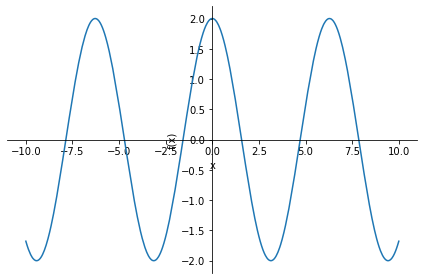

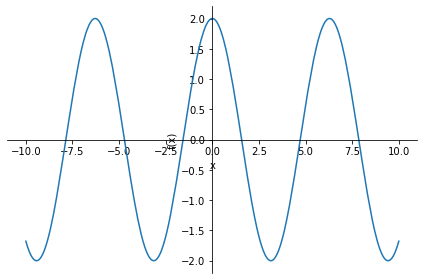

In [114]:
spot( exponent_cos.subs( c_1, 1 ).subs( normalization_constant, 1 ) )
spot( exponent_cos_exponent.subs( c_1, 1 ).subs( normalization_constant, 1 ) )

In [ ]:
exponent_cos

In [ ]:
sp.solve( sp.simplify( sp.Eq( exponent_cos - exponent_cos_exponent, 0 ) ) )#.subs( c_1, 1 ).subs( normalization_constant, 1 ), 
#        exponent_cos_exponent.subs( c_1, 1 ).subs( normalization_constant, 1 ) ) )

In [ ]:
a0 = ( ( sp.exp( x * c_1 * sp.I ) ) + ( sp.exp( -x * c_1 * sp.I ) ) )

In [ ]:
a1 = 2 * sp.cos( x * c_1 )

In [ ]:
sp.simplify( sp.Eq( a0, a1 ) )

In [ ]:
a0

In [ ]:
a1

In [ ]:
psi_low_cos_form = normalization_constant * sp.cos( x * sp.sqrt( total_energy ) )

In [101]:
psi_cos = sp.Eq( psi_low_cos_form, psi( x ) )

NameError: name 'psi_low_cos_form' is not defined

In [84]:
sp.solve( [ psi_cos, physical_contraints, normalization ] )

NameError: name 'psi_cos' is not defined

In [85]:
normalization

Eq(A**2*Integral(psi(x)*conjugate(psi(x)), (x, 0, L)), 1)

In [86]:
norm_sub = sp.Eq( normalization.lhs.subs( psi( x ), psi_cos.lhs ), 1 )

NameError: name 'psi_cos' is not defined

In [87]:
norm_sub

NameError: name 'norm_sub' is not defined

In [88]:
sp.solvers.solveset( [ psi_cos, normalization, norm_sub, sp.Eq( psi( well_length ), psi( 0 ) ) ] )

NameError: name 'psi_cos' is not defined

In [89]:
sp.pprint( sp.solve( sp.simplify( norm_sub ), normalization_constant )[ 0 ] )

NameError: name 'norm_sub' is not defined

In [90]:
physical_contraints

Eq(Eq(psi(Eq(x, L)), 0), Eq(psi(Eq(x, 0)), 0))

In [91]:
psi_low = sp.solvers.ode.dsolve( psi_cos, psi( x ), ics={ psi( well_length ): 0, psi( 0 ): 0 } )

NameError: name 'psi_cos' is not defined

In [92]:
psi_low

Eq(psi(x), A*exp(sqrt(E)*x) + A*exp(-sqrt(E)*x))

In [93]:
normalization.lhs

A**2*Integral(psi(x)*conjugate(psi(x)), (x, 0, L))

In [94]:
sp.simplify( normalization )

Eq(A**2, 1/Integral(psi(x)*conjugate(psi(x)), (x, 0, L)))

In [95]:
psi_cos

NameError: name 'psi_cos' is not defined

In [ ]:
psi_cos

In [96]:
low_norm_sub = normalization.subs( psi( x ), sp.simplify( psi_cos.lhs / normalization_constant ) )

NameError: name 'psi_cos' is not defined

In [97]:
low_norm_sub

NameError: name 'low_norm_sub' is not defined

In [98]:
do_op = lambda equation, operation : sp.simplify( sp.Eq( operation( equation.lhs ), operation( equation.rhs ) ) )

In [99]:
a =  do_op( low_norm_sub, lambda eq : eq / ( normalization_constant ** 2 ) )

sp.simplify( a.doit() )

NameError: name 'low_norm_sub' is not defined

In [100]:
sp.Eq( 0, sp.Eq( sp.cos( well_length * sp.sqrt( total_energy ) ), sp.sin( 2 * well_length * sp.sqrt( total_energy ) ) ) )

False

In [58]:
pa = sp.plot( sp.cos( x ), show = False )
pb = sp.plot( sp.sin( 2 * x ), show=False )
pa.append( pb[ 0 ] )


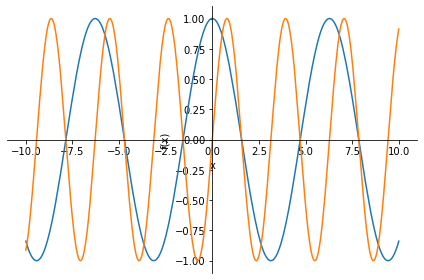

In [59]:
pa.show()

In [60]:
sp.solve( sp.Eq( sp.Eq( sp.cos( x ), sp.sin( 2 * x ) ), 0, evaluate=False ) )

[-pi/2, pi/6, pi/2, 5*pi/6]

In [61]:
to_prove = sp.Eq( sp.cos( x ), sp.sin( 2 * x ) )

In [62]:
to_prove = sp.Eq( to_prove.lhs, to_prove.rhs.subs( sp.sin( 2 * x ), sp.sin( x ) * sp.cos( x ) * 2 ) )

In [63]:
to_prove

Eq(cos(x), 2*sin(x)*cos(x))

In [64]:
to_prove = do_op( to_prove, lambda eq : eq / sp.cos( x ) )

In [65]:
to_prove

Eq(2*sin(x), 1)

In [66]:
to_prove = do_op( to_prove, lambda eq : eq / 2 )

In [67]:
to_prove

Eq(sin(x), 1/2)

In [68]:
to_prove = do_op( to_prove, lambda eq : sp.asin( eq ) )

In [69]:
to_prove

Eq(asin(sin(x)), pi/6)

In [70]:
sp.solve(to_prove )

[pi/6]

In [71]:
idient = sp.Eq( sp.Eq( sp.cos( x ), sp.sin( 2 * x ) ), 0, evaluate = False )

In [72]:
sp.solveset( do_op( idient.lhs, lambda eq : eq.subs( x, x * sp.pi / 6 ) ), domain=sp.S.Integers)

Union(ImageSet(Lambda(_n, 12*_n + 3), Integers), ImageSet(Lambda(_n, 12*_n + 9), Integers), ImageSet(Lambda(_n, 12*_n + 5), Integers), ImageSet(Lambda(_n, 12*_n + 1), Integers))

In [73]:
#Solutions exist therefore 

In [74]:
normed = sp.Eq( normalization_constant, sp.sqrt( 2 / well_length ) )

In [75]:
normed

Eq(A, sqrt(2)/sqrt(L))

In [76]:
psi_fun = sp.cos( x * sp.sqrt( total_energy ) ) * normed.rhs

In [77]:
psi_done = sp.Eq( psi( x ), psi_fun )

In [78]:
psi_done

Eq(psi(x), sqrt(2)*cos(sqrt(E)*x)/sqrt(L))

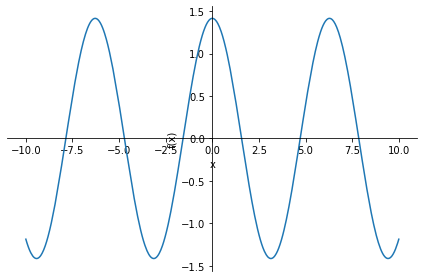

In [79]:
sp.plot( psi_fun.subs( total_energy, 1 ).subs( well_length, 1 ) )

In [80]:
r = psi_fun.subs( total_energy, 1 ).subs( well_length, 1 )

In [81]:
res = sp.lambdify( x, r )

In [82]:
res( 1 )

0.7641028487401796

In [669]:
GRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHHHHHH!!!!!!!!!!!!!!!!!!

SyntaxError: invalid syntax (1696765238.py, line 1)

In [17]:
help(sp.assumptions.assume) 

Help on module sympy.assumptions.assume in sympy.assumptions:

NAME
    sympy.assumptions.assume - A module which implements predicates and assumption context.

CLASSES
    builtins.set(builtins.object)
        AssumptionsContext
    sympy.core.assumptions.ManagedProperties(sympy.core.core.BasicMeta)
        PredicateMeta
    sympy.logic.boolalg.Boolean(sympy.core.basic.Basic)
        AppliedPredicate
        Predicate
            UndefinedPredicate
    
    class AppliedPredicate(sympy.logic.boolalg.Boolean)
     |  AppliedPredicate(predicate, *args)
     |  
     |  The class of expressions resulting from applying ``Predicate`` to
     |  the arguments. ``AppliedPredicate`` merely wraps its argument and
     |  remain unevaluated. To evaluate it, use the ``ask()`` function.
     |  
     |  Examples
     |  ========
     |  
     |  >>> from sympy import Q, ask
     |  >>> Q.integer(1)
     |  Q.integer(1)
     |  
     |  The ``function`` attribute returns the predicate, and the ``a

In [13]:
help( sp.assumptions )

Help on package sympy.assumptions in sympy:

NAME
    sympy.assumptions - A module to implement logical predicates and assumption system.

PACKAGE CONTENTS
    ask
    ask_generated
    assume
    cnf
    facts
    handlers (package)
    predicates (package)
    refine
    relation (package)
    satask
    sathandlers
    tests (package)
    wrapper

CLASSES
    builtins.set(builtins.object)
        sympy.assumptions.assume.AssumptionsContext
    sympy.logic.boolalg.Boolean(sympy.core.basic.Basic)
        sympy.assumptions.assume.AppliedPredicate
            sympy.assumptions.relation.binrel.AppliedBinaryRelation
        sympy.assumptions.assume.Predicate
            sympy.assumptions.relation.binrel.BinaryRelation
    
    class AppliedBinaryRelation(sympy.assumptions.assume.AppliedPredicate)
     |  AppliedBinaryRelation(predicate, *args)
     |  
     |  The class of expressions resulting from applying ``BinaryRelation``
     |  to the arguments.
     |  
     |  Method resolution o